In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [55]:
wine = pd.read_csv("winequality-red.csv")

In [56]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [58]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

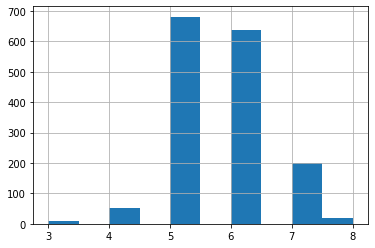

In [59]:
wine["quality"].hist()

In [60]:
wine["quality"] = [1 if x>=7 else 0 for x in wine["quality"]]

As we can see there are many 5 and 6 quality wines in the data

# Lets drop the target variable

In [61]:
target = pd.DataFrame([], columns=['quality'])
target["quality"] = wine["quality"]
wine = wine.drop('quality', axis = 1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Standardize the data

In [62]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
newdata = pd.DataFrame(scale.fit_transform(wine), columns=wine.columns)
wine_data = newdata

In [63]:
wine_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
316,0.735607,0.179770,-0.210412,0.610998,0.308890,2.020207,1.384587,1.512299,-0.072005,-0.048089,-0.303175
412,-0.700719,1.157403,-0.569865,-0.453218,0.266383,-0.083669,0.928453,-0.077742,-0.266384,-0.107102,-1.054113
27,-0.241094,-0.546472,-0.313113,-0.666062,0.393905,-0.561823,-0.287906,-0.077742,-0.914312,1.486251,-0.866379
230,-1.792327,-0.267148,-1.186070,-0.666062,-0.711289,0.298854,1.810313,-2.144795,1.483021,-0.225128,1.668037
1160,1.310138,-0.937525,1.535504,-0.169427,-0.009916,-0.944346,-0.804858,0.007060,-1.108690,0.365003,0.635497


In [64]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [65]:
covarience_matrix = wine_data.cov()
covarience_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000626,-0.256291,0.672124,0.114849,0.093764,-0.153890,-0.113252,0.668465,-0.683406,0.183120,-0.061707
volatile acidity,-0.256291,1.000626,-0.552841,0.001919,0.061336,-0.010510,0.076518,0.022040,0.235084,-0.261150,-0.202415
citric acid,0.672124,-0.552841,1.000626,0.143667,0.203950,-0.061016,0.035555,0.365176,-0.542243,0.312966,0.109972
residual sugar,0.114849,0.001919,0.143667,1.000626,0.055644,0.187166,0.203155,0.355506,-0.085706,0.005531,0.042102
chlorides,0.093764,0.061336,0.203950,0.055644,1.000626,0.005566,0.047430,0.200758,-0.265192,0.371493,-0.221279
free sulfur dioxide,-0.153890,-0.010510,-0.061016,0.187166,0.005566,1.000626,0.668084,-0.021960,0.070422,0.051690,-0.069452
total sulfur dioxide,-0.113252,0.076518,0.035555,0.203155,0.047430,0.668084,1.000626,0.071314,-0.066536,0.042974,-0.205783
density,0.668465,0.022040,0.365176,0.355506,0.200758,-0.021960,0.071314,1.000626,-0.341913,0.148599,-0.496490
pH,-0.683406,0.235084,-0.542243,-0.085706,-0.265192,0.070422,-0.066536,-0.341913,1.000626,-0.196771,0.205761
sulphates,0.183120,-0.261150,0.312966,0.005531,0.371493,0.051690,0.042974,0.148599,-0.196771,1.000626,0.093653


In [66]:
eig_values, eig_vectors = np.linalg.eig(covarience_matrix)
print("\n Number of eigrn vectors :%s\n"%len(eig_vectors))
print("\n Eigen vectors are :%s\n\n" %eig_vectors)
print("\n Eigrn value :%s" %eig_values)


 Number of eigrn vectors :11


 Eigen vectors are :[[-0.48931422  0.11050274  0.12330157  0.22961737  0.08261366 -0.63969145
  -0.24952314  0.19402091 -0.17759545 -0.35022736  0.10147858]
 [ 0.23858436 -0.27493048  0.44996253 -0.07895978 -0.21873452 -0.0023886
   0.36592473 -0.1291103  -0.07877531 -0.5337351   0.41144893]
 [-0.46363166  0.15179136 -0.23824707  0.07941826  0.05857268  0.0709103
   0.62167708 -0.38144967 -0.37751558  0.10549701  0.06959338]
 [-0.14610715 -0.27208024 -0.10128338  0.37279256 -0.73214429 -0.18402996
   0.09287208  0.00752295  0.29984469  0.29066341  0.04915555]
 [-0.21224658 -0.14805156  0.09261383 -0.66619476 -0.2465009  -0.05306532
  -0.21767112  0.11133867 -0.35700936  0.37041337  0.30433857]
 [ 0.03615752 -0.51356681 -0.42879287  0.04353782  0.15915198  0.05142086
   0.24848326  0.63540522 -0.2047805  -0.11659611 -0.01400021]
 [-0.02357485 -0.56948696 -0.3224145   0.03457712  0.22246456 -0.0687016
  -0.37075027 -0.59211589  0.01903597 -0.09366237  0.13

In [67]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.1010718226728247
1.9271148896585188
1.5515137913334232
1.213991749934129
0.9598923792754834
0.05959558245500696
0.18144664164085209
0.3448577877304068
0.42322137844374996
0.5841565453623773
0.6600210359988654


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_data = pca.fit_transform(wine_data)
print(wine_data.shape)
print(x_data.shape)

(1599, 11)
(1599, 2)


In [69]:
x_data


array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

Text(0, 0.5, 'second princeple componen analysis')

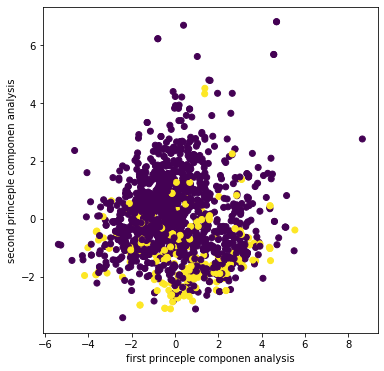

In [70]:
plt.figure(figsize = (6,6))
plt.scatter(x_data[:,0],x_data[:,1],c = target["quality"])
plt.xlabel("first princeple componen analysis")
plt.ylabel("second princeple componen analysis")

In [71]:
x = x_data
y = target["quality"]

In [72]:
from sklearn.model_selection import  train_test_split,KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 7, test_size = 0.20)

In [74]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1279, 2), (1279,), (320, 2), (320,))

In [75]:
models = []

models.append(("LR", LogisticRegression()))
models.append(("RAN", RandomForestClassifier()))
models.append(("ADA", AdaBoostClassifier()))
models.append(("GBS", GradientBoostingClassifier()))
models.append(("XGB", xgb.XGBClassifier(random_state=1,learning_rate=0.01)))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state = 7)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.862371, 0.022582
RAN: 0.885839, 0.016156
ADA: 0.867071, 0.018590
GBS: 0.870183, 0.017095
[12:12:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

In [76]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
print(prediction)
print(accuracy_score(y_test, prediction)*100)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
87.5
[[274   5]
 [ 35   6]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       279
           1       0.55      0.15      0.23        41

    accuracy                           0.88       320
   macro avg       0.72      0.56      0.58       320
weighted avg       0.84      0.88      0.84       

In [77]:
rn = RandomForestClassifier()
rn.fit(x_train, y_train)
predictionran = rn.predict(x_test)
print(prediction)
print(accuracy_score(y_test, predictionran)*100)
print(confusion_matrix(y_test,predictionran))
print(classification_report(y_test,predictionran))

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
85.625
[[261  18]
 [ 28  13]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       279
           1       0.42      0.32      0.36        41

    accuracy                           0.86       320
   macro avg       0.66      0.63      0.64       320
weighted avg       0.84      0.86      0.85     

In [78]:
scr1 = cross_val_score(lr, x, y, cv=5)
scr2 = cross_val_score(rn, x, y, cv=5)
print(scr1.mean())
print(scr2.mean())

0.8592927115987461
0.8336520376175549


In [79]:
parameter = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [10, 20 ,50,100,1000],
    'max_depth' : [2, 4, 6, 8]
}

In [80]:
grid1 = GridSearchCV(RandomForestClassifier(), parameter, cv=5)

In [81]:
grid1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [82]:
print(grid1.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 20}


In [83]:
predictran = grid1.predict(x_test)
print(predictran)
print(accuracy_score(y_test, predictran)*100)
print(confusion_matrix(y_test,predictran))
print(classification_report(y_test,predictran))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
86.875
[[268  11]
 [ 31  10]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       279
           1       0.48      0.24      0.32        41

    accuracy                           0.87       320
   macro avg       0.69      0.60      0.62       320
weighted avg       0.84      0.87      0.85     

In [84]:
import joblib
joblib.dump(grid1, "best.obj")

['best.obj']

In [85]:
model = joblib.load("best.obj")

In [86]:
new = model.predict(x_test)

In [87]:
new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,